## Task # 4 - To Explore Decision Tree Algorithm 
By:-Sachin Bhati

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv(r"C:\Users\c com\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(150, 6)

In [9]:
#checking missing values in the data
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Visualization

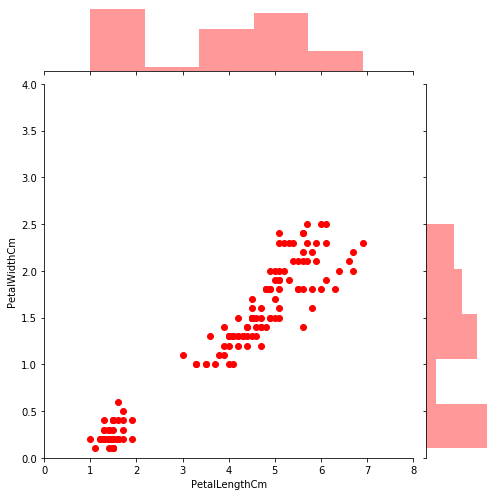

In [15]:
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=data,kind="scatter",xlim=(0, 8), ylim=(0, 4),color="r", height=7)

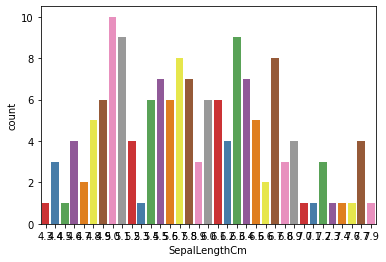

In [19]:
sns.countplot(x="SepalLengthCm",data=data,color="h",palette="Set1")

## Test-Train Split 

In [20]:
#testing our model on real life data
from sklearn.model_selection import train_test_split

In [23]:
#removing dependant variable
X=data.drop(["Id","Species"], axis=1)
type(X)

pandas.core.frame.DataFrame

In [26]:
Y=data["Species"]
type(Y)

pandas.core.series.Series

In [27]:
#train dataset is used to fit the machine learning model
#test dataset is used to evaluate the fit machine learning model(prediction)
#random state is initialized to 0 so as to get the same dataset everytime
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [28]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [29]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


## Training Classification Tree 

In [30]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [31]:
#object to predict values of Y using our X train and expressed variable
clftree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predict values 

In [32]:
#predicting values
Y_train_pred = clftree.predict(X_train)
Y_test_pred = clftree.predict(X_test)

In [34]:
clftree.score(X_train,Y_train)

1.0

## Plotting matrix 

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
accuracy_score(Y_test, Y_test_pred)

1.0

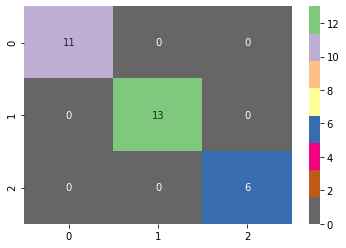

In [42]:
sns.heatmap(confusion_matrix(Y_test, Y_test_pred),annot= True,cmap="Accent_r")

## Plotting Decision-Tree  

In [43]:
#created dot file converted into image and used the image to plot graph
dot_data = tree.export_graphviz(clftree,feature_names=X_train.columns, out_file = None, filled= True)

In [45]:
from IPython.display import Image
import pydotplus

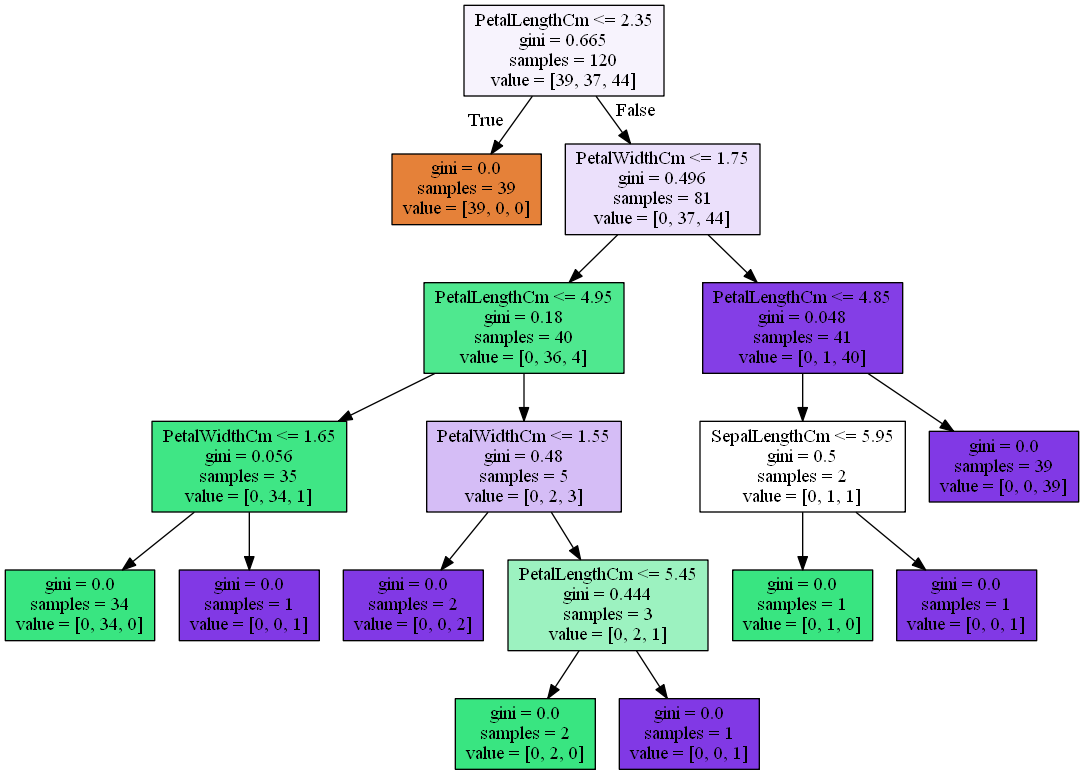

In [46]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())